In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### Data Preprocessing

In [49]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])


In [52]:
for i, j in zip(x_train, y_train):
    print(i, j)

30 70000
50 100000
60 120000
80 150000
100 200000


In [53]:
x_train.mean()
x_train.std()
len(x_train)

5

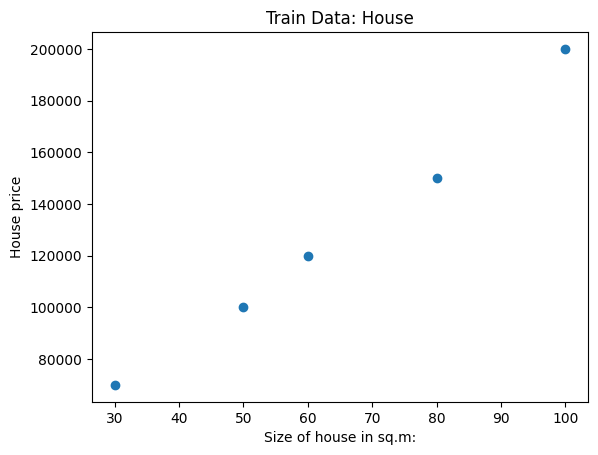

In [54]:
plt.scatter(x_train, y_train)
plt.title("Train Data: House")
plt.xlabel("Size of house in sq.m:")
plt.ylabel("House price")
plt.show()

In [23]:
x_train.shape

(5,)

### Training

In [55]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2

    total_cost = cost / (2 * m)
    return total_cost

In [56]:
compute_cost(x_train, y_train, w=1.5, b=0)

9166115265.0

In [57]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [58]:
compute_gradients(x_train, y_train, w=10, b=10)

(-9212560.0, -127350.0)

In [59]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    # cost function evolution - loss
    j_history = []

    for i in range(0, num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        j_history.append(cost_function(x, y, w, b))

        print(f"Iteraton: {i} | Cost: {j_history[i]:.4} | dj_dw: {dj_dw:.4}, | dj_db: {dj_db:.4} | w: {w:.4} | b: {b:.4}")

    return w, b, j_history

    
    
    

In [69]:
w_init = 0
b_init = 0

iterations = 10
alpha = 1.0e-4

w_final, b_final, j_history = gradient_descent(x=x_train, y=y_train, w_in=w_init, b_in=b_init, alpha=alpha, num_iterations=iterations, cost_function=compute_cost, gradient_function=compute_gradients)
print(f"(w, b) found by gradient descent {w_final:.4} {b_final:.4}")

Iteraton: 0 | Cost: 2.611e+09 | dj_dw: -9.26e+06, | dj_db: -1.28e+05 | w: 926.0 | b: 12.8
Iteraton: 1 | Cost: 7.522e+08 | dj_dw: -4.926e+06, | dj_db: -6.872e+04 | w: 1.419e+03 | b: 19.67
Iteraton: 2 | Cost: 2.264e+08 | dj_dw: -2.62e+06, | dj_db: -3.719e+04 | w: 1.681e+03 | b: 23.39
Iteraton: 3 | Cost: 7.76e+07 | dj_dw: -1.394e+06, | dj_db: -2.042e+04 | w: 1.82e+03 | b: 25.43
Iteraton: 4 | Cost: 3.55e+07 | dj_dw: -7.412e+05, | dj_db: -1.15e+04 | w: 1.894e+03 | b: 26.58
Iteraton: 5 | Cost: 2.359e+07 | dj_dw: -3.943e+05, | dj_db: -6.756e+03 | w: 1.933e+03 | b: 27.26
Iteraton: 6 | Cost: 2.022e+07 | dj_dw: -2.097e+05, | dj_db: -4.232e+03 | w: 1.954e+03 | b: 27.68
Iteraton: 7 | Cost: 1.927e+07 | dj_dw: -1.115e+05, | dj_db: -2.889e+03 | w: 1.966e+03 | b: 27.97
Iteraton: 8 | Cost: 1.9e+07 | dj_dw: -5.932e+04, | dj_db: -2.175e+03 | w: 1.972e+03 | b: 28.19
Iteraton: 9 | Cost: 1.892e+07 | dj_dw: -3.154e+04, | dj_db: -1.795e+03 | w: 1.975e+03 | b: 28.37
(w, b) found by gradient descent 1.975e+03 2

In [70]:
j_history

[2610854101.12,
 752239721.6462482,
 226380181.73583627,
 77598144.66625783,
 35502978.22807495,
 23592822.246017136,
 20222937.912183017,
 19269360.175410174,
 18999430.199724402,
 18922925.29169137]

### Metrics

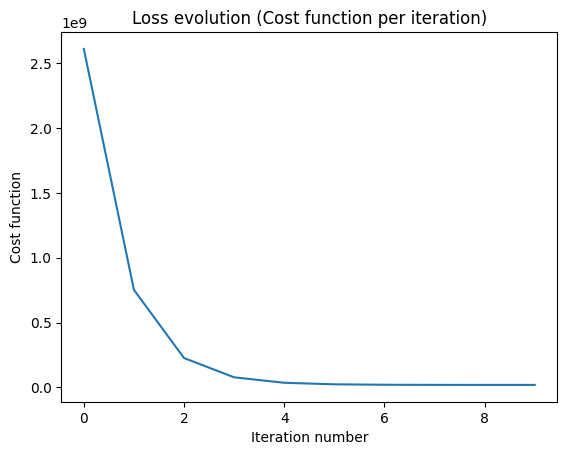

In [71]:
plt.plot(j_history)
plt.title("Loss evolution (Cost function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.show()

In [72]:
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denum = np.sum((y - y.mean())**2)

    score = 1 - num / denum
    return score

In [73]:
y_ = [w_final * i + b_final for i in x_train]
y_

[59268.205148533605,
 98761.429445698,
 118508.04159428019,
 158001.26589144458,
 197494.49018860896]

In [74]:
# the greater the r2 score the more correct our prediction is
r2_score(y_train, y_) # between 0 and 1.

0.9808472416075998

### Prediction

In [75]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])

In [76]:
size_of_house = 20
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")

size_of_house = 30
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 50
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")

size_of_house = 60
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 80
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 100
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")



A house with size(m^2) 20 has a price of: 39521.59299995141
A house with size(m^2) 30 has a price of: 59268.205148533605
A house with size(m^2) 50 has a price of: 98761.429445698
A house with size(m^2) 60 has a price of: 118508.04159428019
A house with size(m^2) 80 has a price of: 158001.26589144458
A house with size(m^2) 100 has a price of: 197494.49018860896


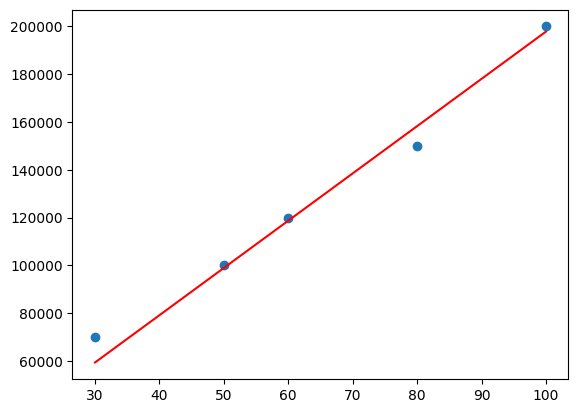

In [37]:
plt.scatter(x_train, y_train)
plt.plot(x_train, w_final * x_train + b_final, c='r')